# Load The Data 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.svm import  SVC
from sklearn.neighbors  import  KNeighborsClassifier
from xgboost import  XGBClassifier

from sklearn.metrics import accuracy_score ,precision_score , recall_score ,f1_score,classification_report

from sklearn.preprocessing import LabelEncoder,StandardScaler

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")


In [2]:
df =pd.read_csv(r'C:\Users\intel\OneDrive\Desktop\data scientist project for githup\gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# Explore Data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
df.duplicated().sum()

1768

In [7]:
df = df.drop_duplicates()

### finding correlations between the numerical (Number) date and between feature 

<Axes: >

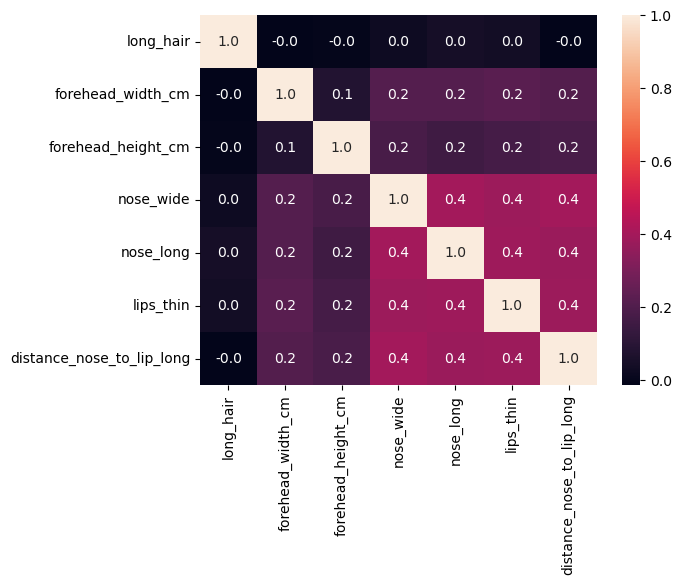

In [8]:

df_cols=df.drop('gender',axis=1)
sns.heatmap(df_cols.corr(),annot=True,fmt='0.1f')

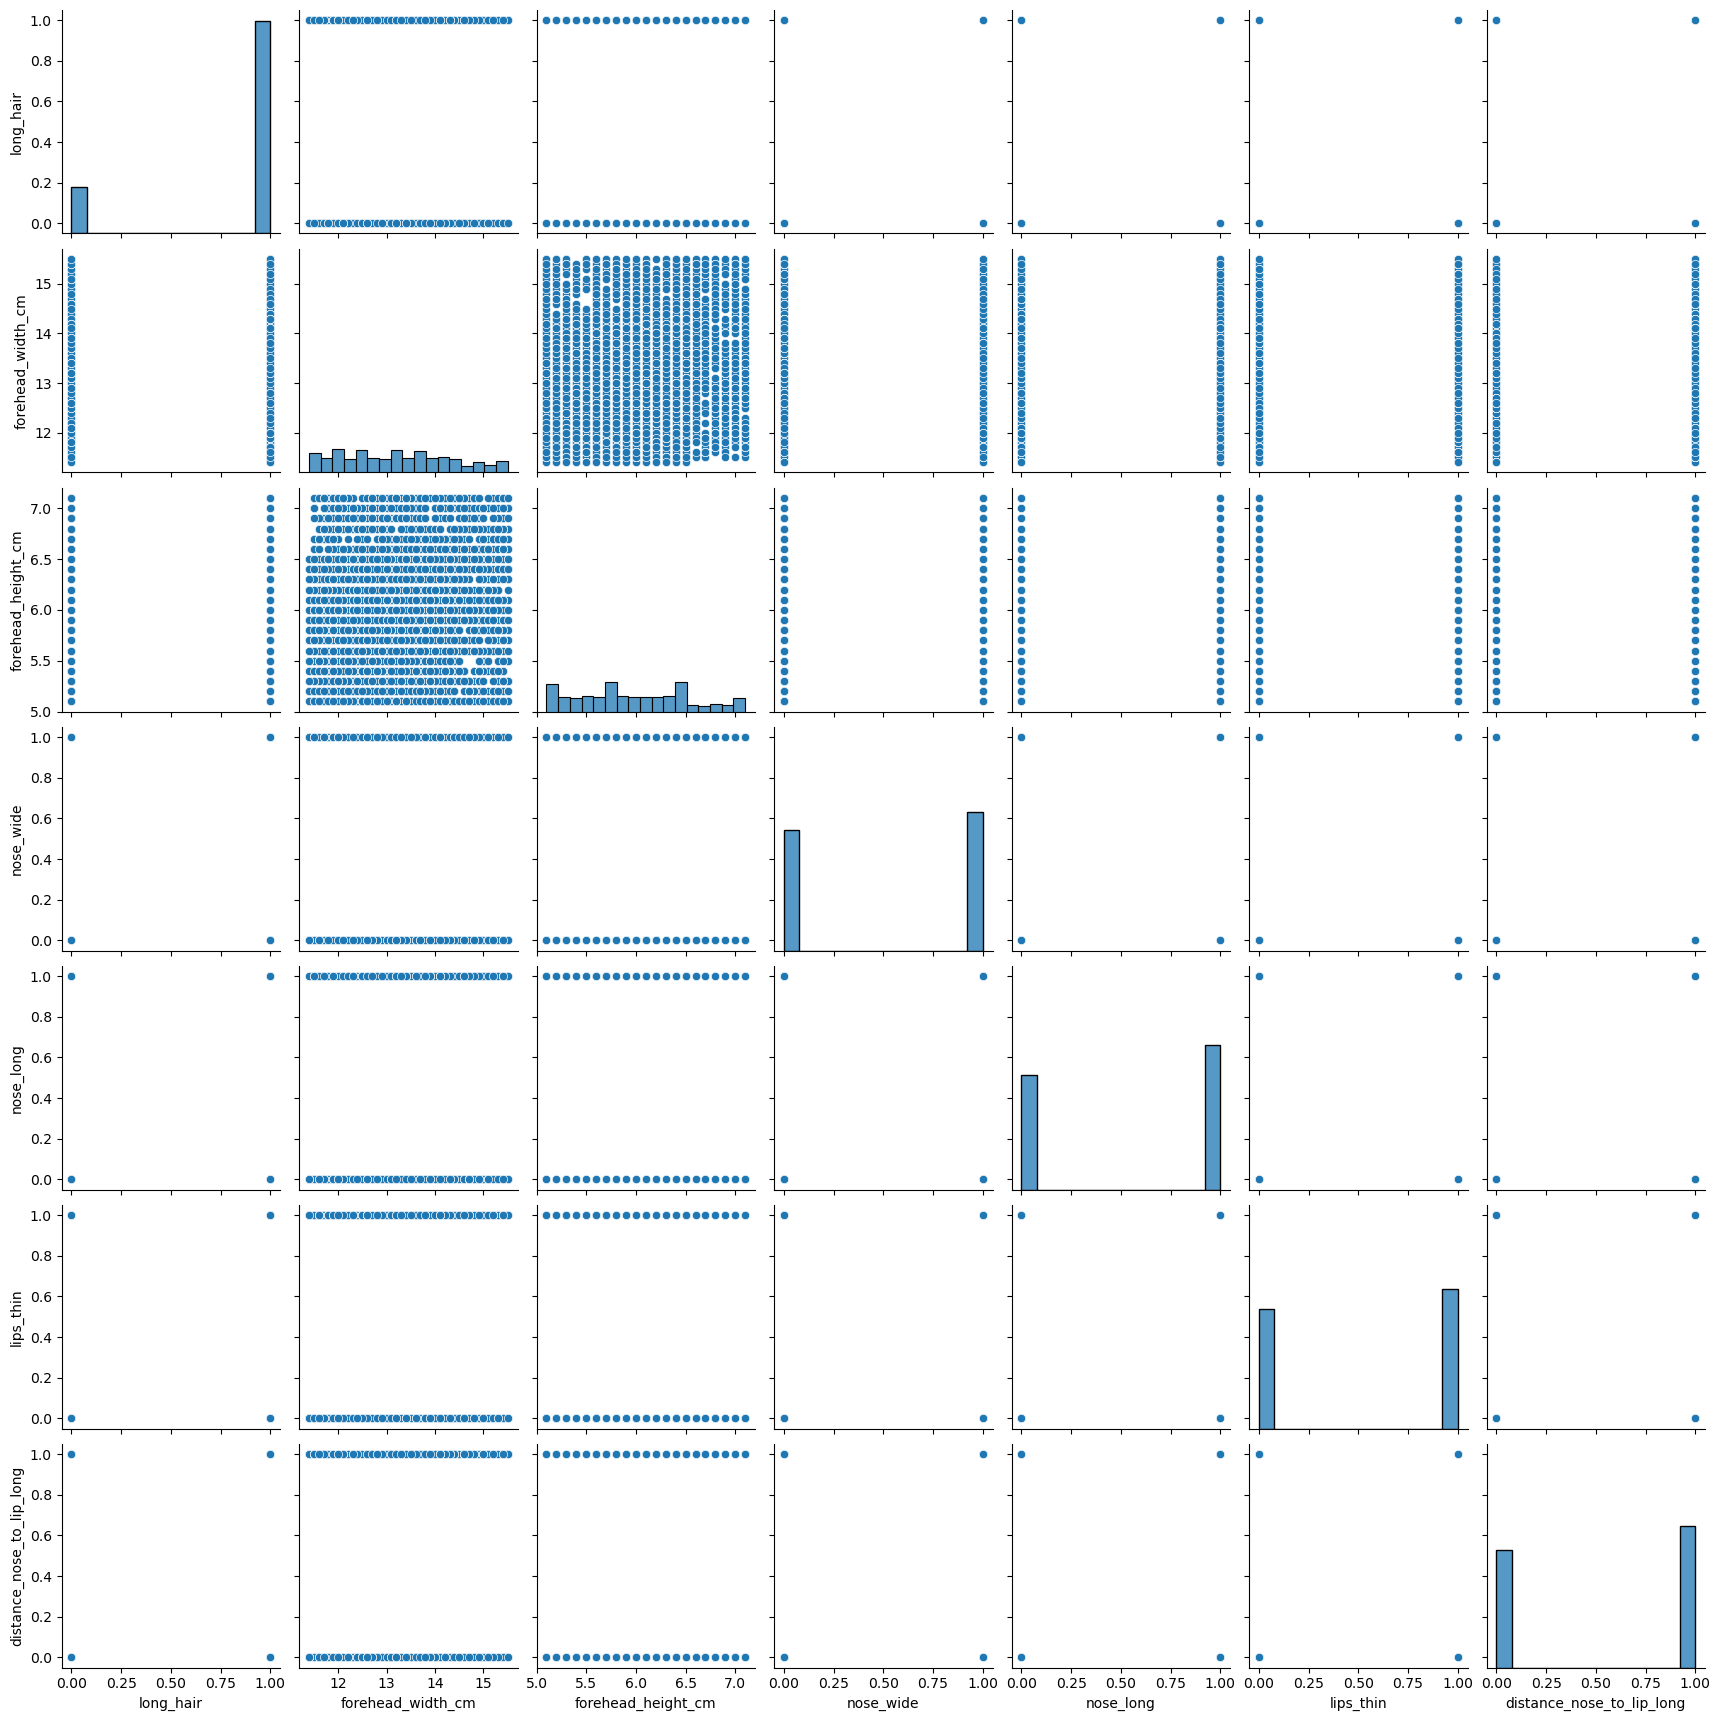

In [9]:
sns.pairplot(df_cols)
plt.show()

### categorical features 

<Axes: xlabel='long_hair', ylabel='count'>

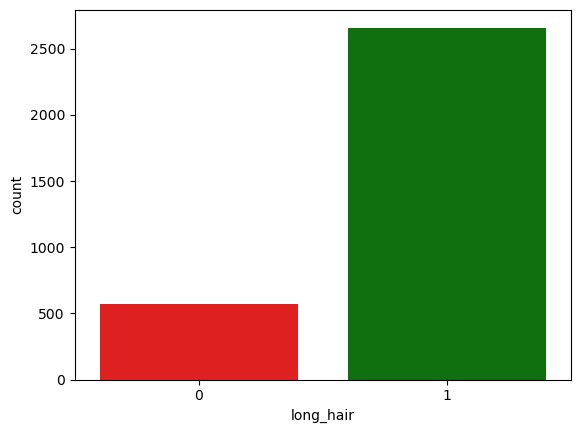

In [10]:
# categorical features 
df['long_hair'].value_counts()
sns.countplot(x='long_hair', data=df,palette=['red','green'])

<Axes: xlabel='nose_wide', ylabel='count'>

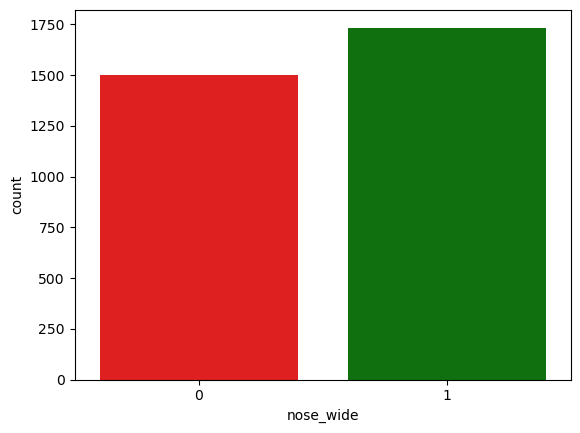

In [11]:
df['nose_wide'].value_counts()
sns.countplot(x='nose_wide', data=df,palette=['red','green'])

<Axes: xlabel='nose_long', ylabel='count'>

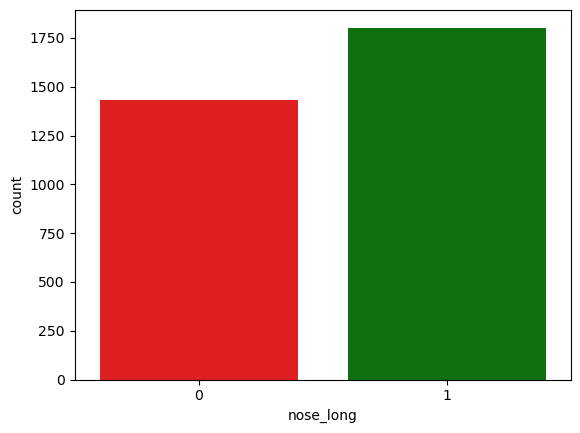

In [12]:
df['nose_long'].value_counts()
sns.countplot(x='nose_long', data=df,palette=['red','green'])

<Axes: xlabel='lips_thin', ylabel='count'>

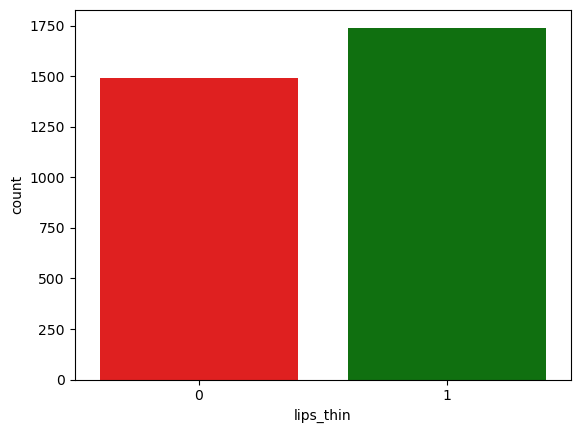

In [13]:
df['lips_thin'].value_counts()
sns.countplot(x='lips_thin', data=df,palette=['red','green'])

<Axes: xlabel='distance_nose_to_lip_long', ylabel='count'>

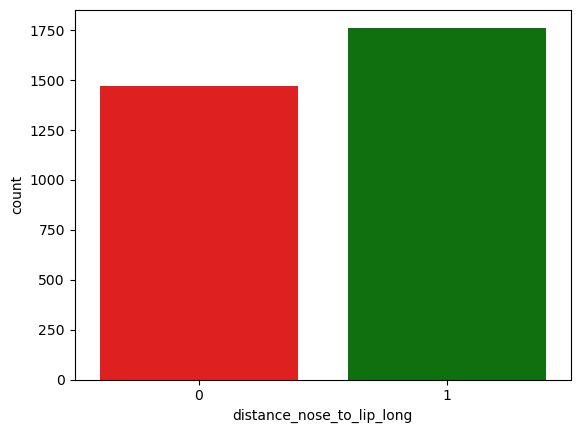

In [14]:
df['distance_nose_to_lip_long'].value_counts()
sns.countplot(x='distance_nose_to_lip_long', data=df,palette=['red','green'])

<Axes: xlabel='gender', ylabel='count'>

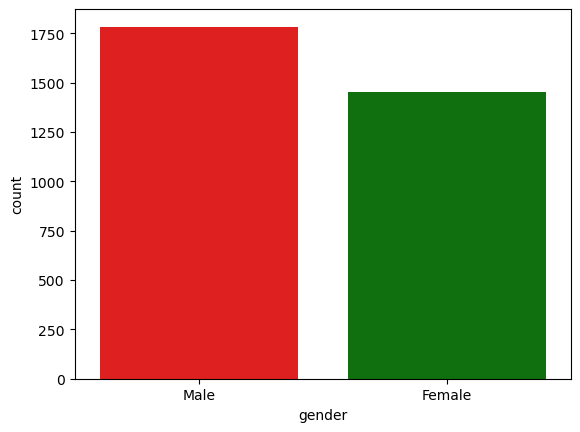

In [15]:
df['gender'].value_counts()
sns.countplot(x='gender', data=df,palette=['red','green'])

### Numerical Features

<Axes: xlabel='forehead_width_cm'>

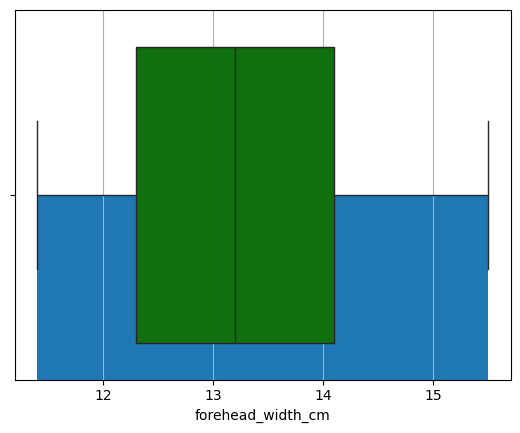

In [16]:
df['forehead_width_cm'].hist(bins=30)
sns.boxplot(x='forehead_width_cm', data=df ,color='green')


<Axes: xlabel='forehead_height_cm'>

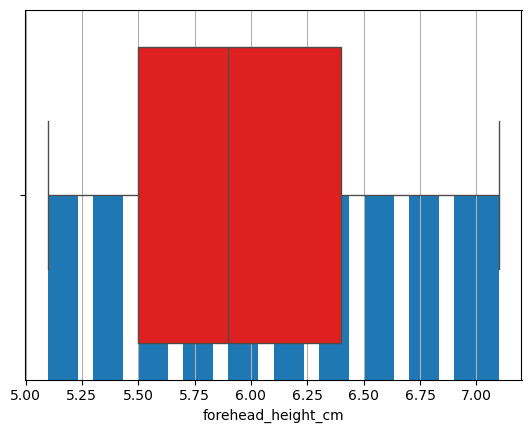

In [17]:
df['forehead_height_cm'].hist(bins=30)
sns.boxplot(x='forehead_height_cm', data=df,color='red')


### Categorical vs Numerical

<Axes: xlabel='gender', ylabel='forehead_width_cm'>

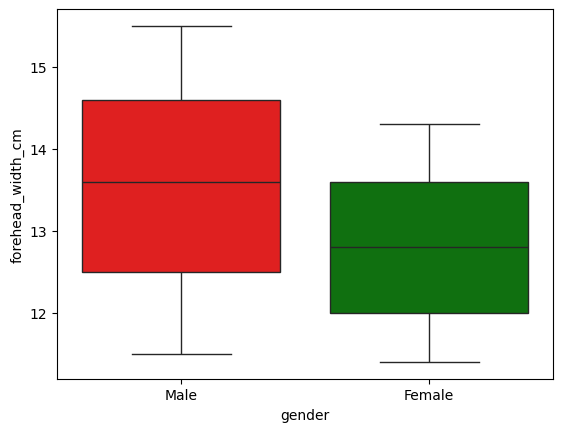

In [18]:
sns.boxplot(x='gender', y='forehead_width_cm', data=df,palette=['red','green'])

<Axes: xlabel='gender', ylabel='forehead_height_cm'>

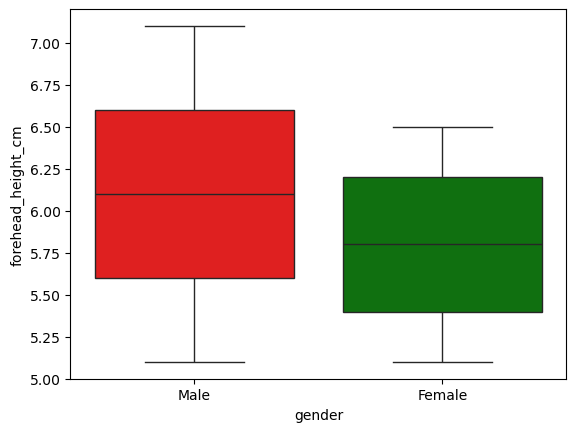

In [19]:
sns.boxplot(x='gender', y='forehead_height_cm', data=df,palette=['red','green'])

### Categorical vs Categorical  

<Axes: xlabel='long_hair', ylabel='gender'>

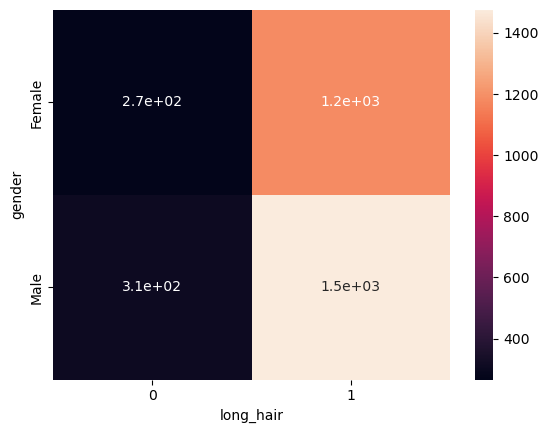

In [20]:
pd.crosstab(df['gender'], df['long_hair'])
sns.heatmap(pd.crosstab(df['gender'], df['long_hair']), annot=True)


<Axes: xlabel='nose_wide', ylabel='gender'>

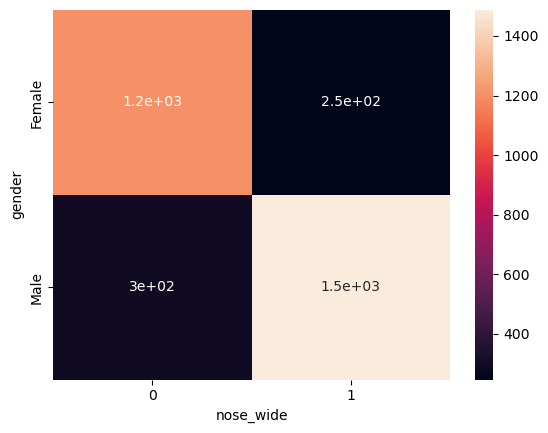

In [21]:
pd.crosstab(df['gender'], df['nose_wide'])
sns.heatmap(pd.crosstab(df['gender'], df['nose_wide']), annot=True)


<Axes: xlabel='nose_long', ylabel='gender'>

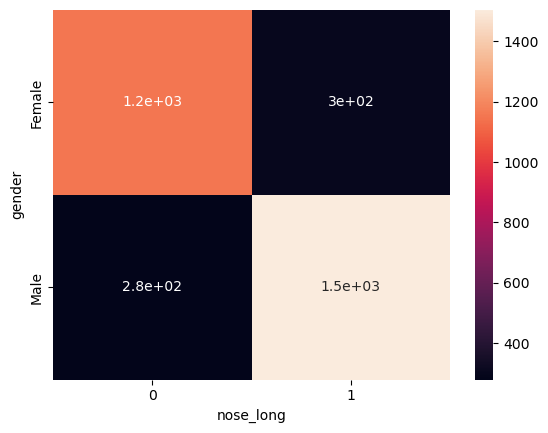

In [22]:
pd.crosstab(df['gender'], df['nose_long'])
sns.heatmap(pd.crosstab(df['gender'], df['nose_long']), annot=True)


<Axes: xlabel='lips_thin', ylabel='gender'>

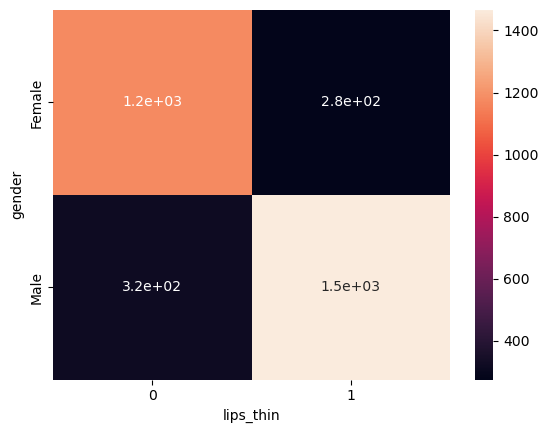

In [23]:
pd.crosstab(df['gender'], df['lips_thin'])
sns.heatmap(pd.crosstab(df['gender'], df['lips_thin']), annot=True)


<Axes: xlabel='distance_nose_to_lip_long', ylabel='gender'>

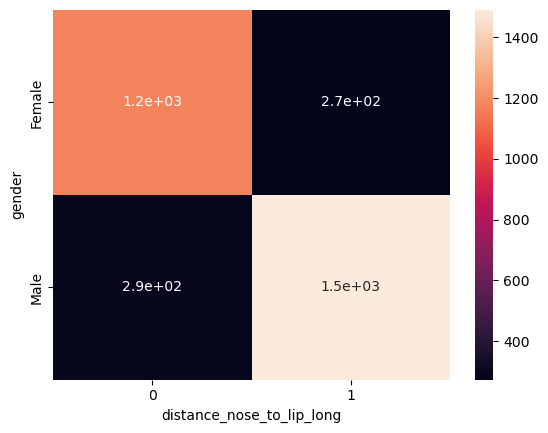

In [24]:
pd.crosstab(df['gender'], df['distance_nose_to_lip_long'])
sns.heatmap(pd.crosstab(df['gender'], df['distance_nose_to_lip_long']), annot=True)


### Outlier Detection

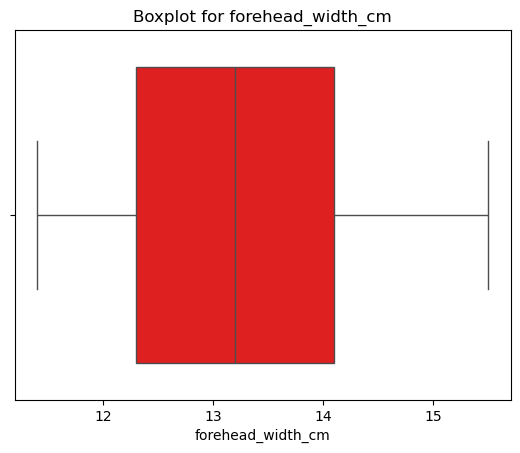

In [25]:
#numerical_data=df['forehead_width_cm','forehead_width_cm']
sns.boxplot(x=df['forehead_width_cm'],color='red')
plt.title(f"Boxplot for forehead_width_cm")
plt.show()


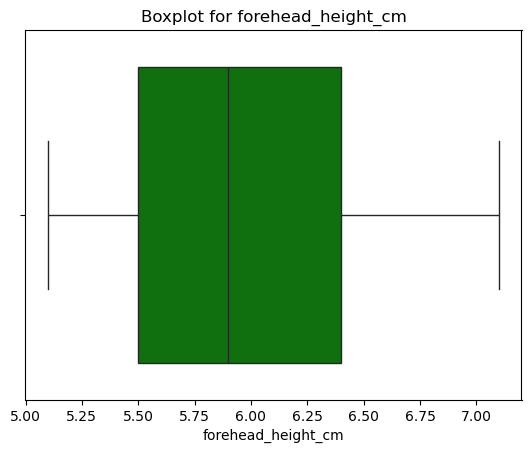

In [26]:
sns.boxplot(x=df['forehead_height_cm'],color='green')
plt.title(f"Boxplot for forehead_height_cm")
plt.show()

In [27]:

Q1 = df[df['forehead_width_cm']].quantile(0.25)
Q3 = df[df['forehead_width_cm']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect Outliers
#outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#print(f"Outliers (IQR): {len(outliers_iqr)}")


KeyError: "None of [Index([11.8, 14.0, 11.8, 14.4, 13.5, 13.0, 15.3, 13.0, 11.9, 12.1,\n       ...\n       13.5, 15.4, 14.1, 13.8, 12.0, 11.7, 12.6, 14.1, 11.6, 12.3],\n      dtype='float64', length=3233)] are in the [columns]"

### PREPROCESSING

In [28]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Change column name


In [29]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


### feature scaling  

In [33]:
scaler = StandardScaler()
df[['forehead_width_cm', 'forehead_height_cm']] = scaler.fit_transform(df[['forehead_width_cm', 'forehead_height_cm']])

In [34]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.270095,0.243699,1,0,1,1,1
1,0,0.701549,-1.029713,0,0,1,0,0
2,0,-1.270095,0.607531,1,1,1,1,1
3,0,1.060029,0.243699,0,1,1,1,1
4,1,0.253448,-0.120133,0,0,0,0,0


## create modeling 

In [35]:
x=df.drop('gender',axis=1)
y=df['gender']

In [36]:
len(x) ,len(y)

(3233, 3233)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
model_1=LogisticRegression()
model_2=RandomForestClassifier()
model_3=GradientBoostingClassifier()
model_4=SVC()
model_5=KNeighborsClassifier()
model_6=XGBClassifier()

In [39]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(y_test,pre))
    

In [40]:
pred(model_1)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       308
           1       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [41]:
pred(model_2)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       308
           1       0.96      0.96      0.96       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



In [42]:
pred(model_3)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       308
           1       0.98      0.94      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [43]:
# is the pest model 
pred(model_4)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       308
           1       0.98      0.95      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [44]:
pred(model_5)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       308
           1       0.96      0.94      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



In [45]:
pred(model_6)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       308
           1       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



## Save the Model 

In [46]:
# saving the model 
import pickle
filename='Gender_classification.sav'
pickle.dump(model_4, open(filename, 'wb'))

In [ ]:
# loading the model 
with open('model_4.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(x_test)
